# Data and sounds - between science and art

There is an interesting relationship between art and science, one from which the whole humanity has benefitted throughout history. In this notebook we take a look at how one might create sound from some information that was never meant for such a purpose, unlike musical compositions. Music and sounds in their rawest form are simply pressure waves that transmit certain information to our brains, beautiful though that information might be. If you change the information, you change the sound you hear.

For further reading, how about [researchers making music from LHC to learn more about the underlying physics](https://phys.org/news/2017-05-lhc-piano-music.html) or listening to some [sonificated collisions?](https://www.youtube.com/watch?v=gPmQcviT-R4)

## Import basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython import display

%matplotlib inline

In [2]:
# Data with two resultant muons.

muons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

### Creating sound

Sounds we hear are waves, so let us create a sine wave of desired properties as the baseline. The one given below is just an example that you can try to modify however you wish.

In [3]:
lngth = 40; base_freq = 220; rate = 44100
ts = np.arange(0, lngth, step=lngth/2/rate)
sweep = np.sqrt((lngth-ts)) * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))

display.Audio(sweep, rate=rate/5)

To make it more interesting, we now start to manipulate our data to create something similar. If the data is not a wave, how shall we make one out of it?

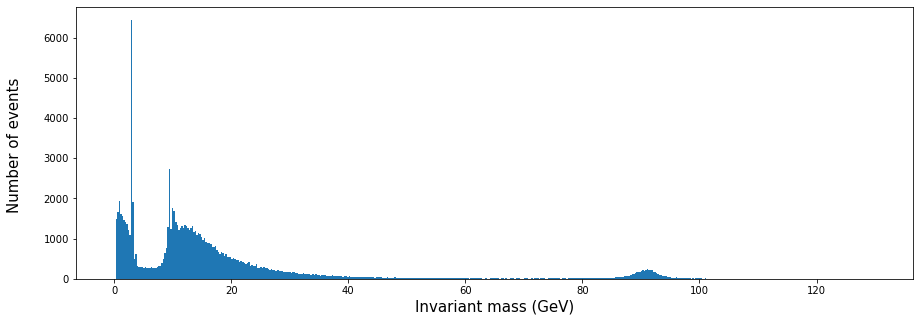

In [4]:
# Check out what the data looks like.

plt.figure(figsize = (15,5))
plt.hist(muons.M, bins = 500, range=(0,130))
plt.xlabel("Invariant mass (GeV)", fontsize = 15)
plt.ylabel("Number of events \n", fontsize = 15)
plt.show()

Here we take the invariant masses from the data, sort them into bins like in the histogram above and use the relative sizes of those bins to amplify the basewave, thus creating a sound that seems to kind of "crawl" along the shape of our data. When you have done the basics in this notebook, how about trying out some other variables in the data, like energy or momenta?

In [5]:
cut = muons.M
lngth = len(cut); base_freq = 440; rate = 44100/2

In [6]:
hist, edges = np.histogram(cut, bins = 500)

In [7]:
a = []

for x in range(0, len(hist)):
    b = hist[x]*np.ones(hist[x])
    a = np.append(a,b)

In [8]:
ts = cut.sort_values()

In [9]:
# sweep = np.sqrt((lngth-ts)) * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))
# sweep = a * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))
# sweep = a * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2)+ np.cos(base_freq*np.power(2, 5/12)*ts**2))
            
# Here are some other waves for the base, as an example.

sweep = a * np.sin(base_freq*ts**2)
display.Audio(sweep, rate=rate)

Does the sound resemble anything? Can you hear how certain mass ranges differ from each other? What happens if you try out different values for rates or basewaves?

Here is also a picture of the wave we just heard. How does it compare to the histogram above?

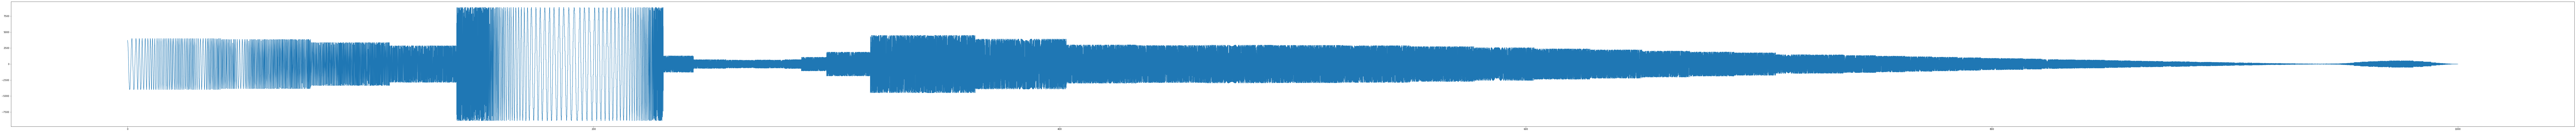

In [10]:
plt.figure(figsize = (200,10)) 
x = np.linspace(0, 1000, len(cut))
plt.plot(x,sweep)
plt.show()